# **📂 Importação de Bibliotecas e Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("marketing_campaign.csv", sep="\t")
# df.shape
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **🛠️ Discovery, Limpeza e Preparação dos dados**

In [2]:
# Explorando o tamanho do dataframe
df.shape

(2240, 29)

In [3]:
# Analise exploratória de Estatistica basica sobre o dataframe, trazendo colunas do tipo object
df.describe(include=object)

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [4]:
# Analise exploratória de Estatistica basica sobre o dataframe, trazendo colunas do tipo int
df.describe(include=int)

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
# Resumindo dataframe para identificar valores ausentes, tipo de dados e tamanho.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Evidenciando os valores a quantidade de valores ausentes.
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# Analisando a coluna Income para encontrar melhor caminho de tratar valores nulos
print(df['Income'].describe())
print(f"A mediana da coluna Income é: {df['Income'].median()}")

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64
A mediana da coluna Income é: 51381.5


In [8]:
# Devido a quantidade de valores nulos estar próximo de 1% do dataframe, optei por excluir para não influenciar na analise
df = df.dropna(subset=['Income'])
print(f"Agora nosso dataframe tem {df.shape[1]} colunas e {df.shape[0]} linhas.✅")



Agora nosso dataframe tem 29 colunas e 2216 linhas.✅


In [9]:
df.iloc[:,:15].head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13


In [10]:
df.iloc[:,15:29].head(10)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [11]:
# Converter coluna Dt_Customer para datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

In [12]:
# Adicionando uma coluna de idade
import datetime

year_now = datetime.datetime.now().year
df['Age'] = year_now - df['Year_Birth']
df['Age'].describe()

count    2216.000000
mean       56.179603
std        11.985554
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

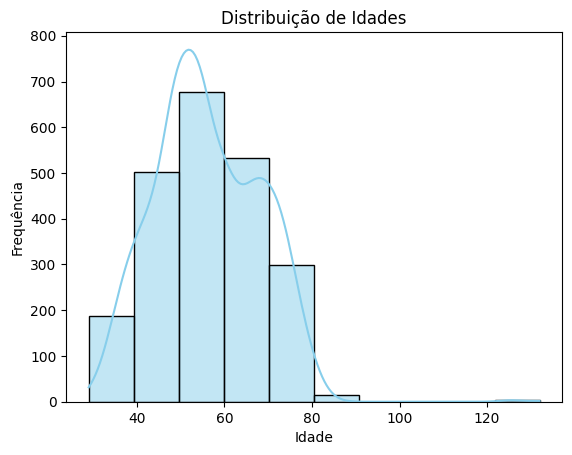

In [ ]:
# Analisando a distribuição de frequência das idades para escolher o melhor range para criar colunas

sns.histplot(df['Age'], kde=True, bins=10 , color='skyblue')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Usando a função cut para adicionar uma coluna de faixa etaria
bins = [29, 39, 49, 59, 69, 79, 132]
labels = ['29-39', '40-49', '50-59', '60-69', '70-79', '+80']
df['Range Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


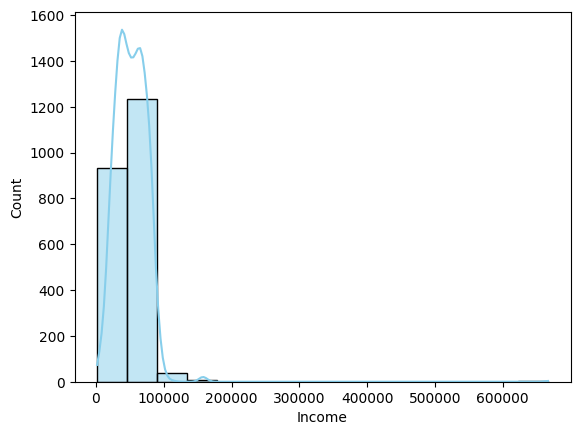

In [ ]:
# Analisando a distribuição de frequência dos slários para escolher o melhor range e criar colunas
print(df['Income'].describe())
sns.histplot(df['Income'], kde=True, bins=15, color='skyblue')
plt.show()

In [ ]:
# Usando a função cut para adicionar uma coluna de faixa salarial
bins=[20000, 40000, 60000, 80000, 100000, 150000, 200000, 666666]
labels=['0-40mil','41-60mil','61-80mil','81-100mil','101-150mil','151-200mil','+201mil']
df['Range Income'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

# **📊 Análises Exploratórias**